<h2>Task 2 - Responsible AI</h2>
Understanding how AI leads to better decisions.

<h3>Bank Marketing</h3>
<h4>Abstract:</h4>
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

<h4>Attribute Information:</h4>
Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

 - Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
 - Previous: number of contacts performed before this campaign and for this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes:

 - Emp.var.rate: employment variation rate - quarterly indicator (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

Analysis Steps:
 - Atribute information Analysis.
 - Machine Learning (Logistic Regression, KNN, SVM, Decision Tree,
 - Random Forest, Naive Bayes)
 - Deep Learning (ANN)

Source: Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [18]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
# import the dataset
data = pd.read_csv("bank-additional-full.csv")

# check shape of the data
data.shape

(41188, 21)

In [20]:
# check first five records
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
# datatypes present
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [22]:
# descriptive statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# concise info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [24]:
# check for duplicate records
data.duplicated().sum()

12

In [25]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [26]:
# remove duplicates
data = data.drop_duplicates()

In [27]:
# missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Insights:
 - The bank dataset has 41188 records and 21 feature varialbles.
 - There were total of 12 duplicate records found and removed.
 - No null/missing values are found.

In [28]:
# numerical and categorical variables
num_var = data.select_dtypes(exclude="object").columns
print("Numerical Columns:\n", num_var)

cat_var = data.select_dtypes(include="object").columns
print("Categorical Columns:\n", cat_var)

Numerical Columns:
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Categorical Columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


### Exploratory Data Analysis (EDA) - Univariate Analysis (Numerical Columns)

In [29]:
for i in num_var:
    print(i, data[i].mean().round(2))

age 40.02
duration 258.32
campaign 2.57
pdays 962.46
previous 0.17
emp.var.rate 0.08
cons.price.idx 93.58
cons.conf.idx -40.5
euribor3m 3.62
nr.employed 5167.03


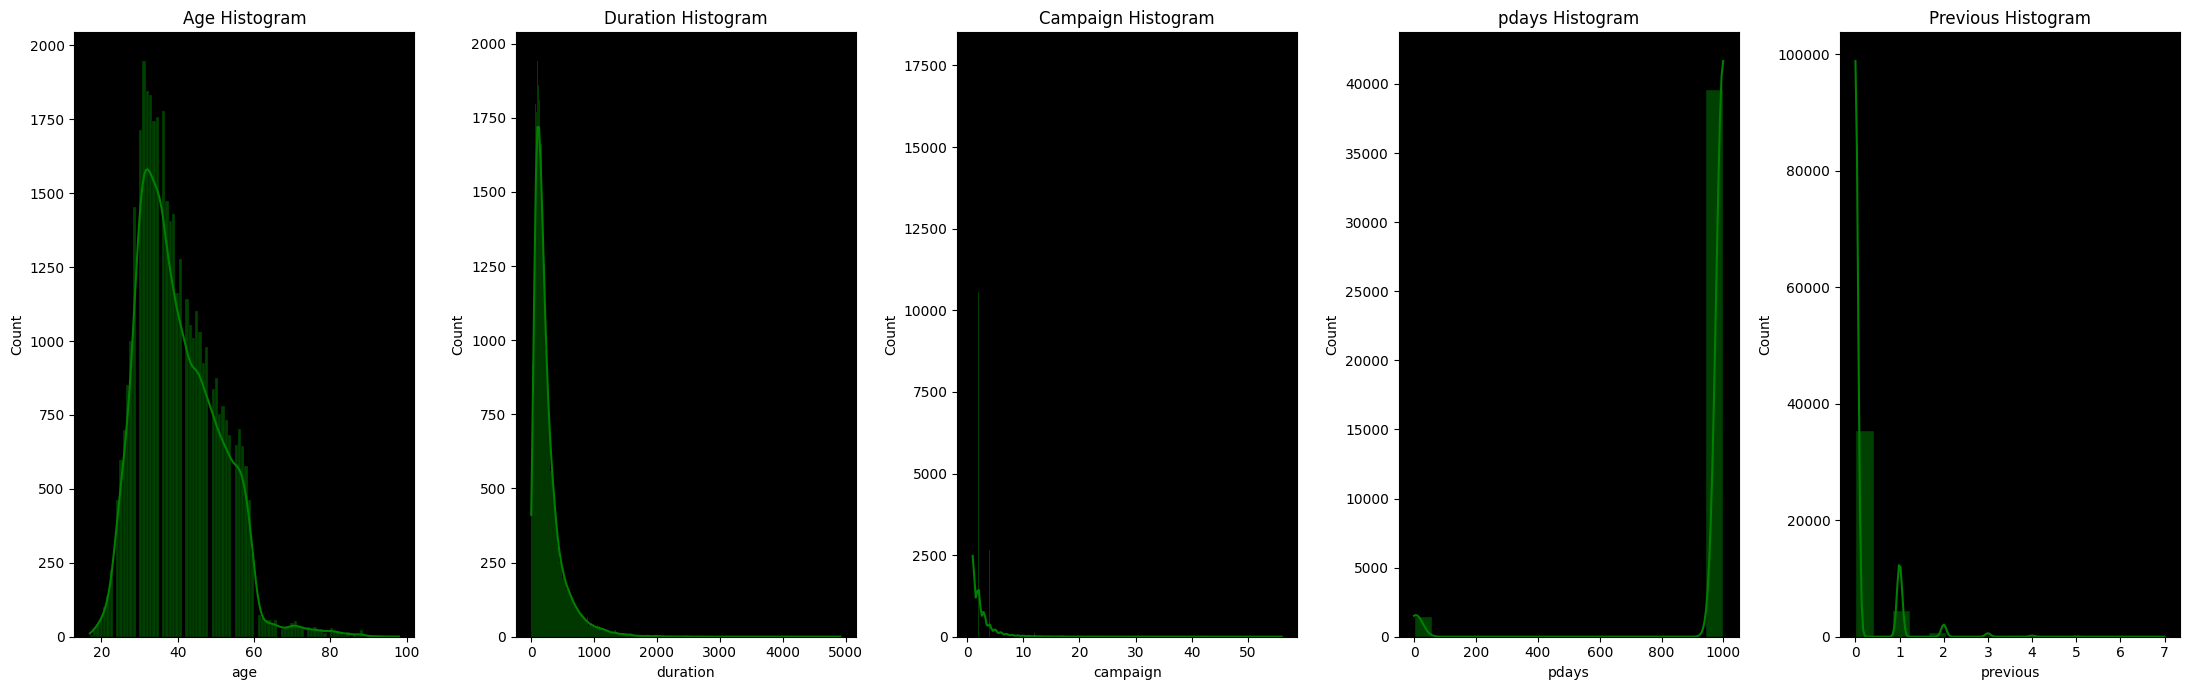

In [30]:
plt.figure(figsize=(22,7))

# age
ax1 = plt.subplot2grid((1,5),(0,0))
sns.histplot(data=data, x='age', kde=True, color='green', ax=ax1)
ax1.set_facecolor('black')
plt.title("Age Histogram")

# duration
ax2 = plt.subplot2grid((1,5),(0,1))
sns.histplot(data=data, x='duration', kde=True, color='green', ax=ax2)
ax2.set_facecolor('black')
plt.title("Duration Histogram")

# campaign
ax3 = plt.subplot2grid((1,5),(0,2))
sns.histplot(data=data, x='campaign', kde=True, color='green', ax=ax3)
ax3.set_facecolor('black')
plt.title("Campaign Histogram")

# pdays
ax4 = plt.subplot2grid((1,5),(0,3))
sns.histplot(data=data, x='pdays', kde=True, color='green', ax=ax4)
ax4.set_facecolor('black')
plt.title("pdays Histogram")

# previous
ax5 = plt.subplot2grid((1,5),(0,4))
sns.histplot(data=data, x='previous', kde=True, color='green', ax=ax5)
ax5.set_facecolor('black')
plt.title("Previous Histogram")

plt.tight_layout()
plt.show()

#### Insights:
 - age, duration, campaign, previous has a positively skewed distribution indicating that our dataset has most clients aged between 25 to 35 years old, call durations between 500 - 600 seconds, number of campaign contacts between 0 to 2 and most clients are not previously contacted before this campaign.
 - pdays has negatively skewed distribution indicating that most clients are not previously contacted after the last campaign. 

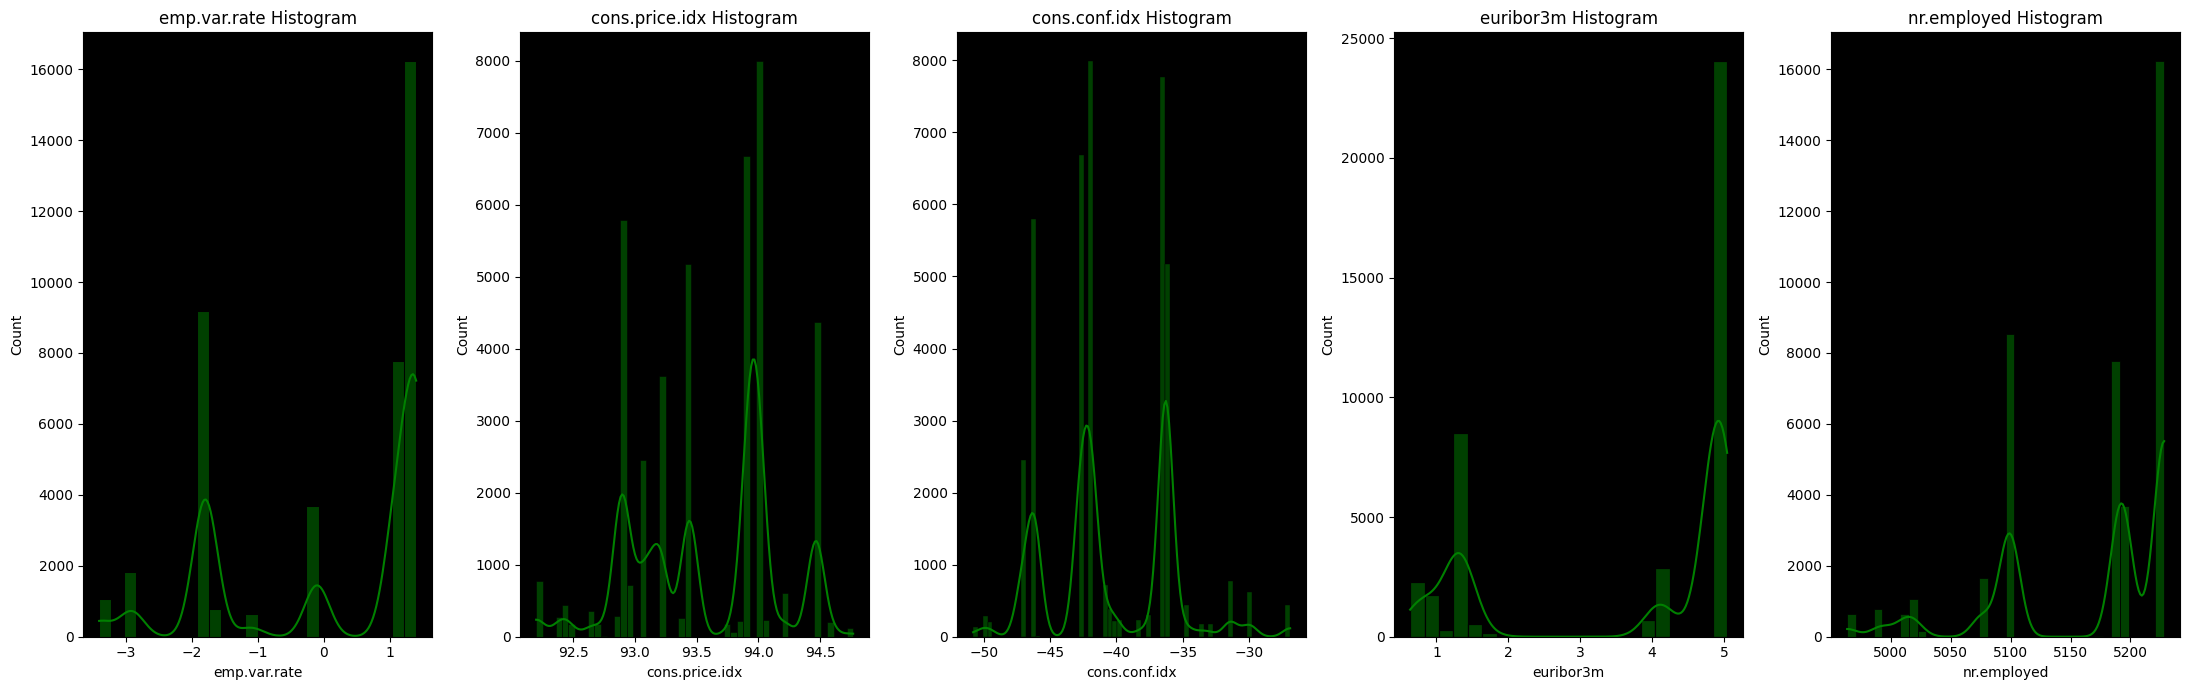

In [31]:
plt.figure(figsize=(22,7))

# emp.var.rate

ax1 = plt.subplot2grid((1,5),(0,0))
sns.histplot(data=data, x='emp.var.rate', kde=True, color='green', ax=ax1)
ax1.set_facecolor('black')
plt.title("emp.var.rate Histogram")

# cons.price.idx

ax2 = plt.subplot2grid((1,5),(0,1))
sns.histplot(data=data, x='cons.price.idx', kde=True, color='green', ax=ax2)
ax2.set_facecolor('black')
plt.title("cons.price.idx Histogram")

# cons.conf.idx

ax3 = plt.subplot2grid((1,5),(0,2))
sns.histplot(data=data, x='cons.conf.idx', kde=True, color='green', ax=ax3)
ax3.set_facecolor('black')
plt.title("cons.conf.idx Histogram")

# euribor3m

ax4 = plt.subplot2grid((1,5),(0,3))
sns.histplot(data=data, x='euribor3m', kde=True, color='green', ax=ax4)
ax4.set_facecolor('black')
plt.title("euribor3m Histogram")

# nr.employed

ax5 = plt.subplot2grid((1,5),(0,4))
sns.histplot(data=data, x='nr.employed', kde=True, color='green', ax=ax5)
ax5.set_facecolor('black')
plt.title("nr.employed Histogram")

plt.tight_layout()
plt.show()

#### Insights:
 - employment variation rate, Euro Interbank Offered Rate and number of employees has a somewhat negatively skewed distribution indicating that the employment variation rate, euribor and number of employees are higher.
 - consumet price index and consumer confidence index has somewhat normal distribution indicating that the change over time in the prices paid by consumers for a representative basket of goods and services and how optimistic or pessimistic consumers are regarding their expected financial situation is close to the average values.

### Exploratory Data Analysis (EDA) - Univariate Analysis (Categorical Columns)